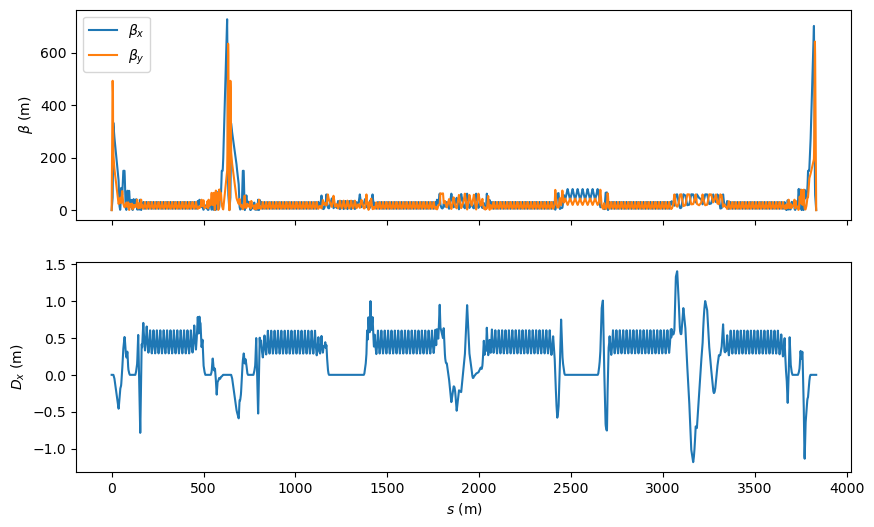

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fname = 'C:/Users/WAN/Downloads/ESR/Version-6.2/output/esr-ring-norad.tfs'
data = np.loadtxt(fname,skiprows=52,usecols=(2,3,6,15,17,19,22))

fig,ax = plt.subplots(2,1,sharex=True,figsize=(10, 6))
ax[0].plot(data[:,0],data[:,1],label=r'$\beta_x$')
ax[0].plot(data[:,0],data[:,2],label=r'$\beta_y$')
ax[0].set_ylabel(r'$\beta$ (m)')
ax[0].legend()
ax[1].plot(data[:,0],data[:,3])
ax[1].set_xlabel('$s$ (m)')
ax[1].set_ylabel(r'$D_x$ (m)')
plt.show()


Text(0, 0.5, '$D_x$ (m)')

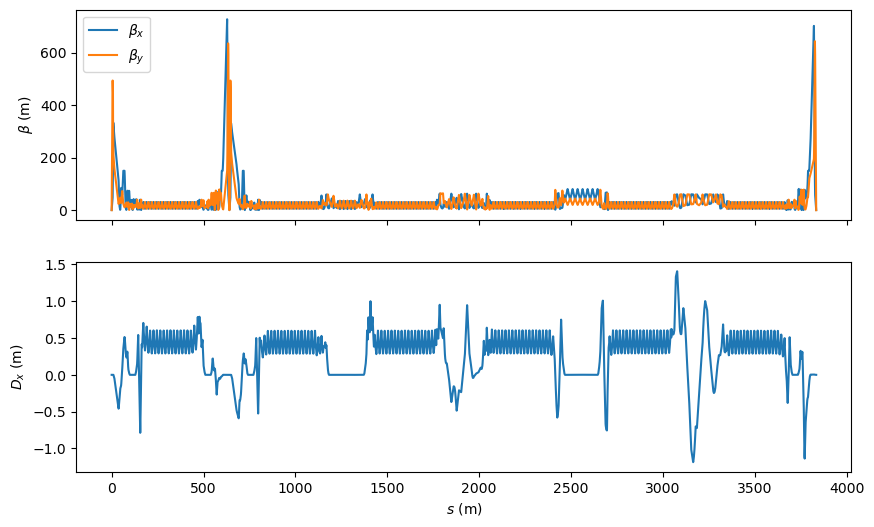

In [5]:
jname = 'C:/Users/WAN/Desktop/JuTrack.jl/twiss_matrix.txt'
jdata = np.loadtxt(jname)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10, 6))
ax[0].plot(jdata[:,0],jdata[:,1],label=r'$\beta_x$')
ax[0].plot(jdata[:,0],jdata[:,2],label=r'$\beta_y$')
ax[0].set_ylabel(r'$\beta$ (m)')
ax[0].legend()
ax[1].plot(jdata[:,0],jdata[:,5])
ax[1].set_xlabel('$s$ (m)')
ax[1].set_ylabel(r'$D_x$ (m)')



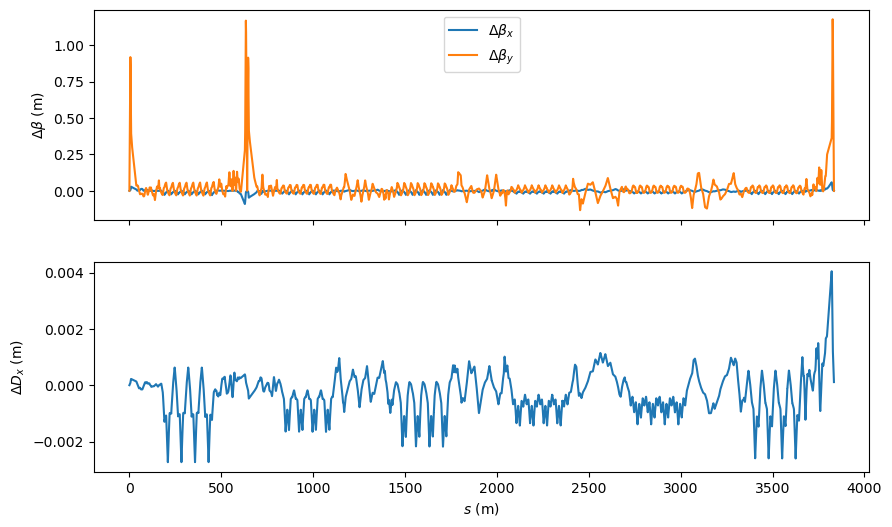

In [8]:
diff = np.zeros((len(jdata),3))
# find the difference between the two twiss files
for i in range(len(jdata)):
    # find the same position
    idx = np.argmin(np.abs(data[:,0]-jdata[i,0]))
    diff[i,0] = jdata[i,1] - data[idx,1]
    diff[i,1] = jdata[i,2] - data[idx,2]
    diff[i,2] = jdata[i,5] - data[idx,3]
# plot
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10, 6))
ax[0].plot(jdata[:,0],diff[:,0],label=r'$\Delta \beta_x$')
ax[0].plot(jdata[:,0],diff[:,1],label=r'$\Delta \beta_y$')
ax[0].set_ylabel(r'$\Delta \beta$ (m)')
ax[0].legend()
ax[1].plot(jdata[:,0],diff[:,2])
ax[1].set_xlabel('$s$ (m)')
ax[1].set_ylabel(r'$\Delta D_x$ (m)')
plt.show()

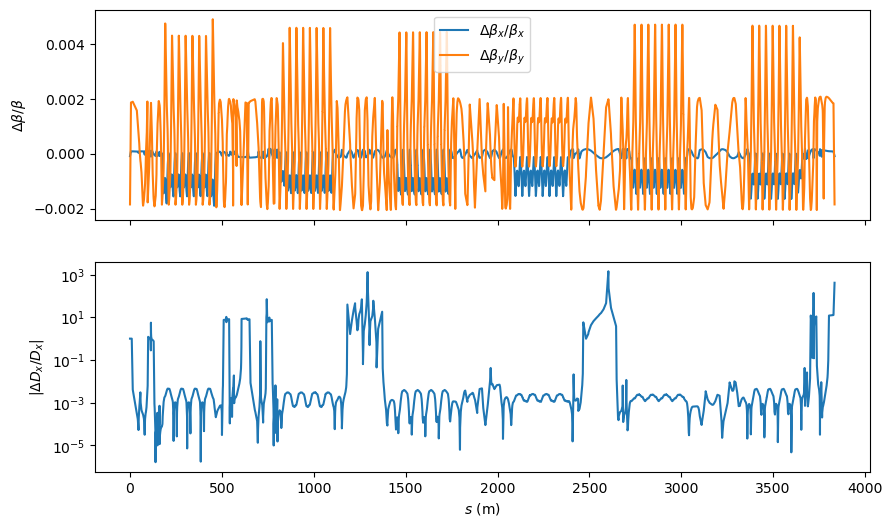

In [12]:
relative_diff = np.zeros((len(jdata),3))
# find the difference between the two twiss files
for i in range(len(jdata)):
    # find the same position
    idx = np.argmin(np.abs(data[:,0]-jdata[i,0]))
    relative_diff[i,0] = diff[i,0]/data[idx,1]
    relative_diff[i,1] = diff[i,1]/data[idx,2]
    relative_diff[i,2] = diff[i,2]/data[idx,3]
    
# plot
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10, 6))
ax[0].plot(jdata[:,0],relative_diff[:,0],label=r'$\Delta \beta_x/\beta_x$')
ax[0].plot(jdata[:,0],relative_diff[:,1],label=r'$\Delta \beta_y/\beta_y$')
ax[0].set_ylabel(r'$\Delta \beta/\beta$')
ax[0].legend()
ax[1].plot(jdata[:,0],abs(relative_diff[:,2]))
ax[1].set_xlabel('$s$ (m)')
ax[1].set_ylabel(r'|$\Delta D_x/D_x$|')
# log scale
ax[1].set_yscale('log')
plt.show()